<a href="https://colab.research.google.com/github/dzakimaulana/Diabetes-Risk-Assessment/blob/main/dra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## **Data Collection**

In [265]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
file_path = '/content/drive/My Drive/TRI/Semester 4/Kecerdasan Artificial/diabetes_prediction_dataset.csv'

In [267]:
import pandas as pd
import numpy as np

In [268]:
data = pd.read_csv(file_path)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [270]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## **Data Preprocessing**

In [271]:
unique_gender_values = data['gender'].unique()
unique_gender_values

array(['Female', 'Male', 'Other'], dtype=object)

In [272]:
# Map 'Male' to 1 and 'Female' to 0
data = data[data['gender'] != 'Other']
data['gender'] = data['gender'].replace({'Male': 1, 'Female': 0}).astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  int64  
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 7.6+ MB


<ipython-input-272-5359a85855b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'] = data['gender'].replace({'Male': 1, 'Female': 0}).astype(np.int64)


In [273]:
unique_smoking_values = data['smoking_history'].unique()
unique_smoking_values

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [274]:
# Map 'Male' to 1 and 'Female' to 0
data = data[data['smoking_history'] != 'No Info']
data['smoking_history'] = data['smoking_history'].replace({'never': 0, 'current': 1, 'former': 2, 'ever': 3, 'not current': 4}).astype(np.int64)
data

<ipython-input-274-e984b370ff5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoking_history'] = data['smoking_history'].replace({'never': 0, 'current': 1, 'former': 2, 'ever': 3, 'not current': 4}).astype(np.int64)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,0,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,0,26.0,0,0,0,34.34,6.5,160,0
99993,0,40.0,0,0,0,40.69,3.5,155,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [275]:
data.value_counts('diabetes')

diabetes
0    57126
1     7046
Name: count, dtype: int64

In [276]:
# reduce the total value of 0 so that it equals the number of 1 values ​​in the diabetes column
diabetes_0_rows = data[data['diabetes'] == 0]
sample_size = int(0.85 * len(diabetes_0_rows))
rows_to_drop = diabetes_0_rows.sample(n=sample_size, random_state=42)
data_dropped = data.drop(rows_to_drop.index)
data = data_dropped
data_filtered = data[data['diabetes'] == 0]
data_filtered

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12,0,78.0,0,0,2,36.05,5.0,130,0
23,0,72.0,0,1,2,27.94,6.5,130,0
91,0,44.0,0,0,0,37.35,5.7,145,0
100,1,38.0,0,0,0,27.32,6.0,158,0
113,0,47.0,0,0,0,20.60,4.0,145,0
...,...,...,...,...,...,...,...,...,...
99948,0,56.0,1,0,2,39.62,4.5,126,0
99956,1,26.0,0,0,3,25.60,6.6,90,0
99958,0,38.0,0,0,4,23.58,4.8,85,0
99993,0,40.0,0,0,0,40.69,3.5,155,0


In [277]:
# represent ration betwwen 0 and 1 in diabetes column
data.value_counts('diabetes')

diabetes
0    8569
1    7046
Name: count, dtype: int64

In [278]:
data.reset_index(drop=True, inplace=True)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,44.0,0,0,0,19.31,6.5,200,1
1,0,78.0,0,0,2,36.05,5.0,130,0
2,0,72.0,0,1,2,27.94,6.5,130,0
3,1,67.0,0,1,4,27.32,6.5,200,1
4,1,50.0,1,0,1,27.32,5.7,260,1
...,...,...,...,...,...,...,...,...,...
15610,0,38.0,0,0,4,23.58,4.8,85,0
15611,0,58.0,1,0,0,38.31,7.0,200,1
15612,0,61.0,0,0,1,30.11,6.2,240,1
15613,0,40.0,0,0,0,40.69,3.5,155,0


## **Data Splitting**

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from keras.utils import to_categorical

In [280]:
X = data.drop(columns=['diabetes'], axis=1)
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [281]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[-8.46878655e-01,  8.41381769e-01,  2.31481055e+00, ...,
        -7.02912052e-01, -2.24481873e-01,  2.15005578e+00],
       [-8.46878655e-01,  2.62965010e-01, -4.32000796e-01, ...,
        -5.98899416e-01,  2.29040537e+00, -3.59915669e-01],
       [-8.46878655e-01,  1.47238187e+00, -4.32000796e-01, ...,
        -3.61357043e-01,  3.25649712e-01, -1.34831822e-03],
       ...,
       [-8.46878655e-01, -8.93868508e-01, -4.32000796e-01, ...,
        -3.78223957e-01, -2.03205708e+00, -1.43561772e+00],
       [-8.46878655e-01,  1.47238187e+00, -4.32000796e-01, ...,
        -1.24687003e+00,  1.66168356e+00, -1.34831822e-03],
       [-8.46878655e-01, -1.36711858e+00, -4.32000796e-01, ...,
        -1.42116147e+00,  3.25649712e-01, -9.09901558e-02]])

In [282]:
y_train_categories = to_categorical(y_train)
y_test_categories = to_categorical(y_test)
y_test_categories

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

## **Model Architecture and Configuration**

In [283]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [284]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=16, activation='relu'),
    Dropout(0.5),
    Dense(units=2, activation='sigmoid')
])

In [285]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [286]:
# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## **Training the Model**

In [287]:
print("[INFO] training network...")
H = model.fit(X_train, y_train_categories, epochs=20, batch_size=16, validation_data=(X_test, y_test_categories))

[INFO] training network...
Epoch 1/20
684/684 [==============================] - 3s 3ms/step - loss: 0.4247 - accuracy: 0.8115 - val_loss: 0.2679 - val_accuracy: 0.8785
Epoch 2/20
684/684 [==============================] - 2s 3ms/step - loss: 0.3033 - accuracy: 0.8683 - val_loss: 0.2628 - val_accuracy: 0.8732
Epoch 3/20
684/684 [==============================] - 2s 3ms/step - loss: 0.2890 - accuracy: 0.8653 - val_loss: 0.2605 - val_accuracy: 0.8773
Epoch 4/20
684/684 [==============================] - 2s 3ms/step - loss: 0.2840 - accuracy: 0.8689 - val_loss: 0.2574 - val_accuracy: 0.8749
Epoch 5/20
684/684 [==============================] - 3s 4ms/step - loss: 0.2762 - accuracy: 0.8668 - val_loss: 0.2557 - val_accuracy: 0.8758
Epoch 6/20
684/684 [==============================] - 3s 4ms/step - loss: 0.2714 - accuracy: 0.8713 - val_loss: 0.2518 - val_accuracy: 0.8775
Epoch 7/20
684/684 [==============================] - 2s 3ms/step - loss: 0.2675 - accuracy: 0.8696 - val_loss: 0.2471 - 

## **Model Evaluation**

In [288]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_categories)
print(f'Loss: {test_loss}')
print(f'Accuracy: {test_accuracy}')

147/147 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9027
Loss: 0.20312094688415527
Accuracy: 0.9026681184768677


In [289]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 32)                288       
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 dense_39 (Dense)            (None, 2)                 34        
                                                                 
Total params: 850 (3.32 KB)
Trainable params: 850 (3.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Overview

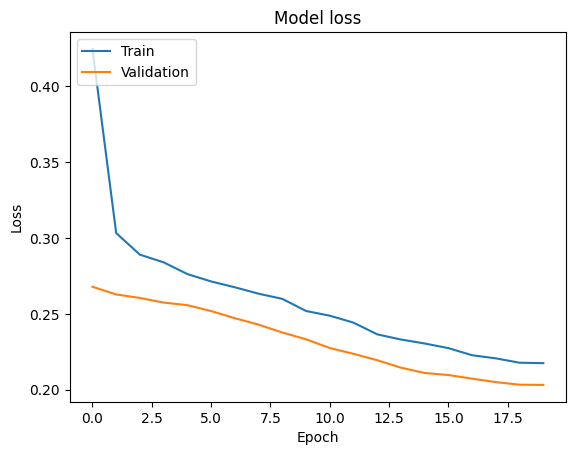

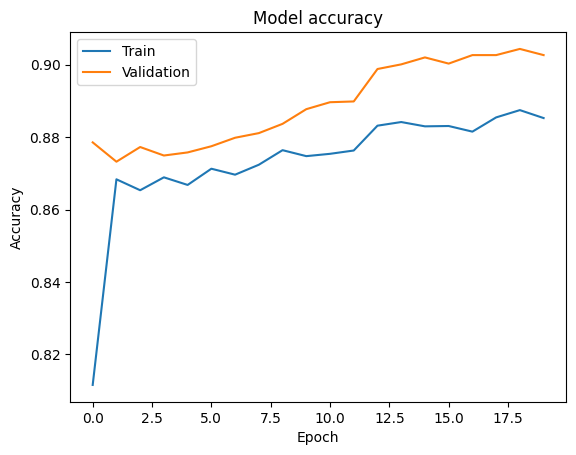

In [290]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Confusion Matrix

147/147 [==============================] - 0s 1ms/step


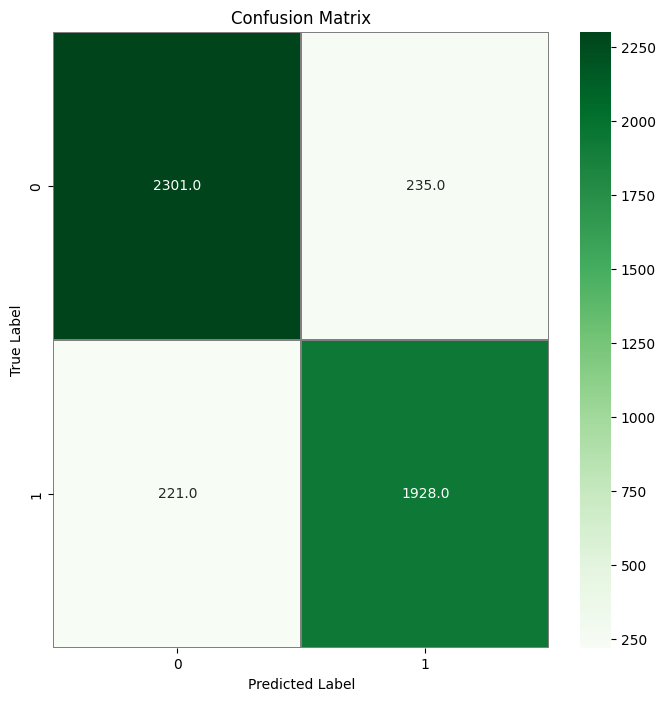

In [291]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test_categories,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()